In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Загрузка данных
# Классификация
def upload_classification_data():
    from google.colab import files
    uploaded = files.upload()
    klass_df = pd.read_csv(list(uploaded.keys())[0])
    return klass_df

# Регрессия
def upload_regression_data():
    from google.colab import files
    uploaded = files.upload()
    reg_df = pd.read_csv(list(uploaded.keys())[0])
    return reg_df

# Загрузка данных
print("Загрузите файл для задачи классификации")
klass_df = upload_classification_data()
print("Загрузите файл для задачи регрессии")
reg_df = upload_regression_data()

# Вывод первых строк данных
print("\nКлассификационные данные:")
print(klass_df.head())
print("\nРегрессионные данные:")
print(reg_df.head())

# Обработка категориальных данных для классификации
categorical_columns_klass = klass_df.select_dtypes(include=['object']).columns
if len(categorical_columns_klass) > 0:
    for col in categorical_columns_klass:
        klass_df[col] = LabelEncoder().fit_transform(klass_df[col])

# Обработка категориальных данных для регрессии
categorical_columns_reg = reg_df.select_dtypes(include=['object']).columns
if len(categorical_columns_reg) > 0:
    for col in categorical_columns_reg:
        reg_df[col] = LabelEncoder().fit_transform(reg_df[col])


Загрузите файл для задачи классификации


Saving klass.csv to klass.csv
Загрузите файл для задачи регрессии


Saving reg.csv to reg.csv

Классификационные данные:
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity

In [2]:
# Выбор метрик качества
# Для классификации - точность (accuracy)
# Для регрессии - среднеквадратичная ошибка (MSE)

# Разделение данных на тренировочные и тестовые наборы
X_klass = klass_df.iloc[:, :-1]
y_klass = klass_df.iloc[:, -1]
X_train_klass, X_test_klass, y_train_klass, y_test_klass = train_test_split(X_klass, y_klass, test_size=0.2, random_state=42)

X_reg = reg_df.iloc[:, :-1]
y_reg = reg_df.iloc[:, -1]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_klass = scaler.fit_transform(X_train_klass)
X_test_klass = scaler.transform(X_test_klass)

X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)


In [3]:
# Обучение базовых моделей
# Решающее дерево для классификации
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_klass, y_train_klass)
y_pred_klass = decision_tree_classifier.predict(X_test_klass)
klass_accuracy = accuracy_score(y_test_klass, y_pred_klass)

# Решающее дерево для регрессии
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = decision_tree_regressor.predict(X_test_reg)
reg_mse = mean_squared_error(y_test_reg, y_pred_reg)

# Вывод результатов бейзлайна
print(f"Точность классификации (решающее дерево): {klass_accuracy:.4f}")
print(f"Среднеквадратичная ошибка регрессии (решающее дерево): {reg_mse:.4f}")


Точность классификации (решающее дерево): 0.9519
Среднеквадратичная ошибка регрессии (решающее дерево): 714.5515


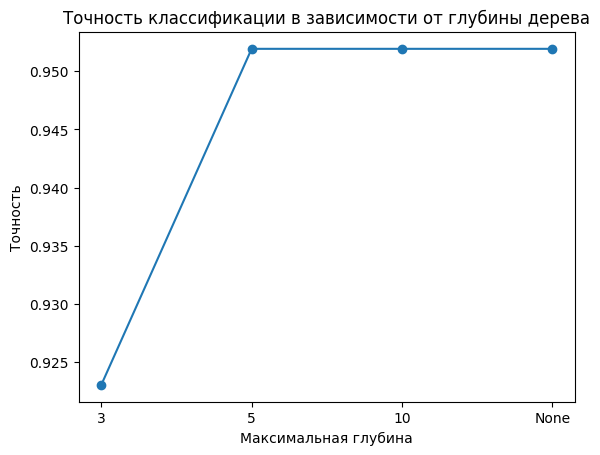

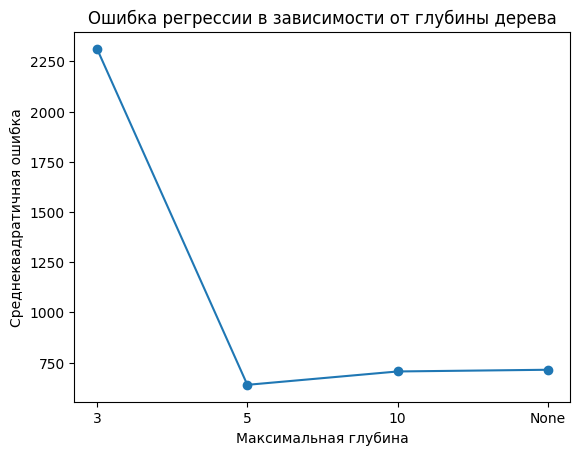

In [4]:
# Улучшение бейзлайна
# Подбор гиперпараметров для решающего дерева (глубина дерева)
max_depths = [3, 5, 10, None]
accuracy_scores = []
mse_scores = []

# Классификация
for max_depth in max_depths:
    decision_tree_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    decision_tree_classifier.fit(X_train_klass, y_train_klass)
    y_pred = decision_tree_classifier.predict(X_test_klass)
    accuracy_scores.append(accuracy_score(y_test_klass, y_pred))

# Визуализация точности для классификации
plt.figure()
plt.plot([str(d) for d in max_depths], accuracy_scores, marker='o')
plt.title('Точность классификации в зависимости от глубины дерева')
plt.xlabel('Максимальная глубина')
plt.ylabel('Точность')
plt.show()

# Регрессия
for max_depth in max_depths:
    decision_tree_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    decision_tree_regressor.fit(X_train_reg, y_train_reg)
    y_pred = decision_tree_regressor.predict(X_test_reg)
    mse_scores.append(mean_squared_error(y_test_reg, y_pred))

# Визуализация ошибки для регрессии
plt.figure()
plt.plot([str(d) for d in max_depths], mse_scores, marker='o')
plt.title('Ошибка регрессии в зависимости от глубины дерева')
plt.xlabel('Максимальная глубина')
plt.ylabel('Среднеквадратичная ошибка')
plt.show()

In [5]:
# Улучшенные модели
# Классификация с оптимальной глубиной
best_depth_classification = max_depths[np.argmax(accuracy_scores)]
decision_tree_classifier = DecisionTreeClassifier(max_depth=best_depth_classification, random_state=42)
decision_tree_classifier.fit(X_train_klass, y_train_klass)
y_pred_klass = decision_tree_classifier.predict(X_test_klass)
klass_accuracy = accuracy_score(y_test_klass, y_pred_klass)

# Регрессия с оптимальной глубиной
best_depth_regression = max_depths[np.argmin(mse_scores)]
decision_tree_regressor = DecisionTreeRegressor(max_depth=best_depth_regression, random_state=42)
decision_tree_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = decision_tree_regressor.predict(X_test_reg)
reg_mse = mean_squared_error(y_test_reg, y_pred_reg)

# Вывод результатов улучшенных моделей
print(f"Улучшенная точность классификации (решающее дерево): {klass_accuracy:.4f}")
print(f"Улучшенная среднеквадратичная ошибка регрессии (решающее дерево): {reg_mse:.4f}")


Улучшенная точность классификации (решающее дерево): 0.9519
Улучшенная среднеквадратичная ошибка регрессии (решающее дерево): 639.4852
